In [13]:
## libraries

from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os

In [14]:
##---to get image's dimention in pixel---##
def get_num_pixels(image):
    width, height = Image.open(image).size
    return width,height

In [15]:
ascii_char = list("               $@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,\"^`'. ") ## len = 70

In [16]:
## read image
filename = 'pyret-logo.png'


## get dimensions
width,height = get_num_pixels(filename)
ratio = height/width;


## size of matrix 
actual_matrix_length = int(100 * ratio)
actual_matrix_width = 100


## size of images derived
actual_img_length = int(100*ratio*8)
actual_img_width = 800


if os.path.exists(filename):

    ## resize pic, use antialias filter to give high quality reduction.
    ## store pixels in 8-bit value.
    img_array = np.array(Image.open(filename).resize((actual_matrix_width ,actual_matrix_length), Image.ANTIALIAS).convert('L'))


    img = Image.new('L', (actual_img_width, actual_img_length), 255)
    draw_object = ImageDraw.Draw(img)

    ## set font, font size, encoding.
    ## notice: only for mac users, the full path of the font is required.
    font = ImageFont.truetype('/Library/Fonts/Times New Roman.ttf', 10, encoding='unic')

    ## draw on image ascii code 
    for j in range(actual_matrix_length):
        for k in range(actual_matrix_width):
            
            ## coordinates of each ascii character
            x, y = k * 8 , j * 8
            
            ## pixel value are no more than 255, so it can be mapping to ascii list with length 70
            index = int(img_array[j][k] / 4)
            draw_object.text((x, y), ascii_char[index], font=font, fill=0)
    name = 'output.jpeg'
    print("image saved to: "+ name)

    img.save(name, 'JPEG')

image saved to: output.jpeg


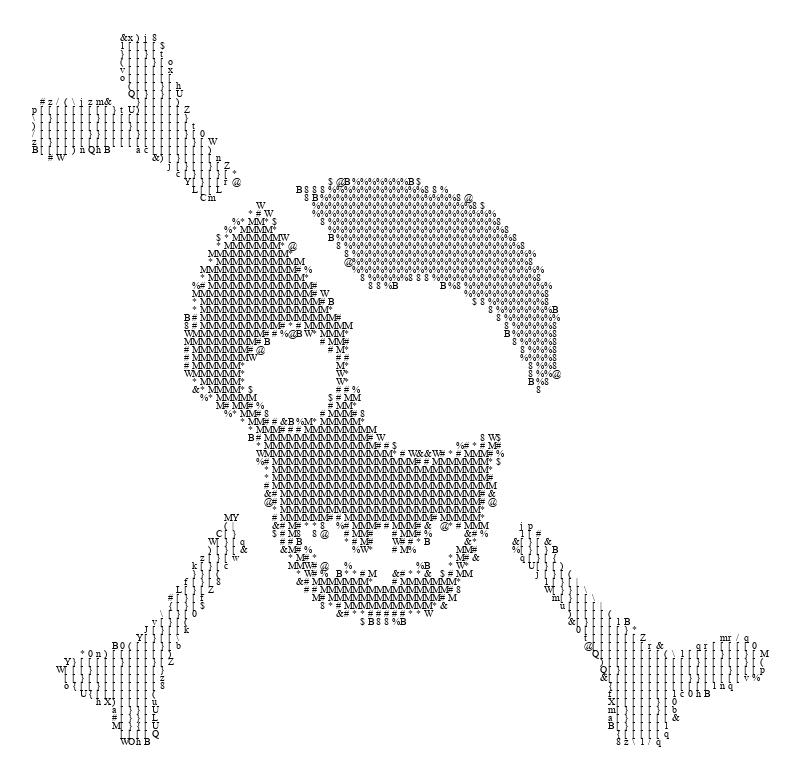

In [17]:
from IPython.display import Image
Image("output.jpeg")
## Image("pyret-logo.png")